# Data Visulization Exercises

We are using again the hotel booking dataset.

In [1]:
import pandas as pd
from lets_plot import *

df = pd.read_csv('hotel-bookings.csv')

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

Revenue Distribution by Hotel Type:
* Create a boxplot to visualize the distribution of adr (average daily rate) for each hotel type (Resort Hotel and City Hotel).
* Use a swarmplot to overlay individual data points on top of the boxplot to show the spread of the data.

In [3]:
LetsPlot.setup_html()

In [4]:
ggplot(df[df['adr']<4000], aes(x="hotel", y="adr")) + geom_boxplot(alpha=0.5)

<Axes: xlabel='hotel', ylabel='adr'>

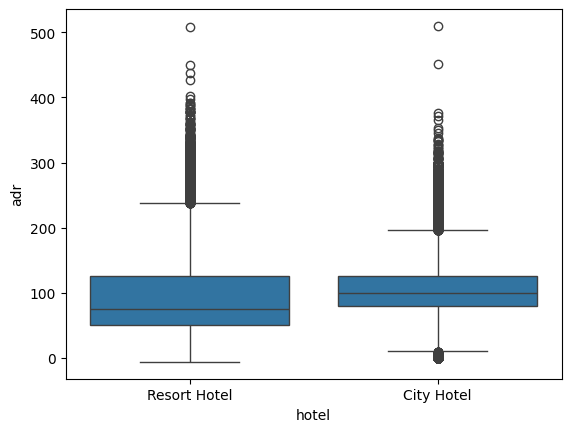

In [5]:
sns.boxplot(x="hotel", y="adr", data = df[df['adr']<4000])

<Axes: xlabel='hotel', ylabel='adr'>

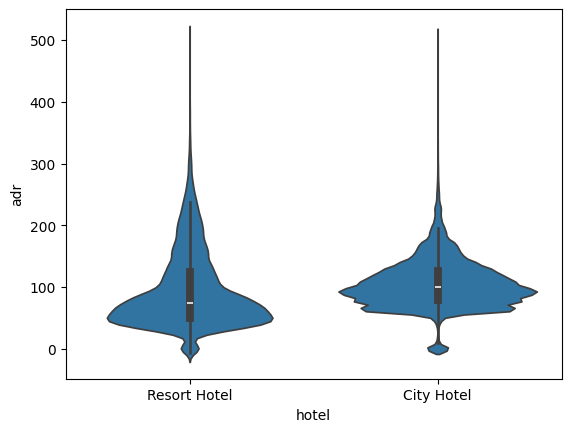

In [7]:
sns.violinplot(x="hotel", y="adr", data = df[df['adr']<4000])

In [ ]:
ax = sns.swarmplot(x="day", y="total_bill", data=tips, zorder=0)
# plot boxplot
sns.boxplot(x="day", y="total_bill", data=tips, 
                 showcaps=False,boxprops={'facecolor':'None'},
                 showfliers=False,whiskerprops={'linewidth':0}, ax=ax)
   
plt.show()


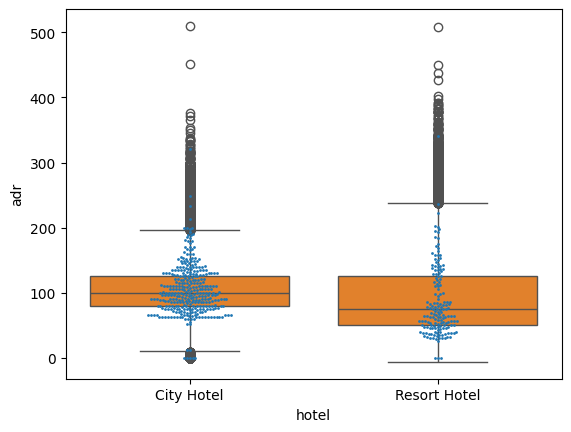

In [14]:
ax = sns.swarmplot(x="hotel", y="adr", data = df[df['adr']<4000].sample(500), size=2)
sns.boxplot(x="hotel", y="adr", data = df[df['adr']<4000], ax = ax)
plt.show()

Booking Trends Over Time:
* Create a line plot to show the number of bookings per month for each hotel type.
* Use the hue parameter to differentiate between Resort Hotel and City Hotel.



In [15]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [48]:
df.shape

(119390, 32)

In [18]:
monthlyData = df.groupby(['arrival_date_month','hotel']).size().reset_index(name="count")
monthlyData

,arrival_date_month,hotel,count
0,April,City Hotel,7480
1,April,Resort Hotel,3609
2,August,City Hotel,8983
3,August,Resort Hotel,4894
4,December,City Hotel,4132
5,December,Resort Hotel,2648
6,February,City Hotel,4965
7,February,Resort Hotel,3103
8,January,City Hotel,3736
9,January,Resort Hotel,2193


In [21]:
def get_month_number(month):
    months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
    return(months.index(month)+1.0)

print(get_month_number("December"))



12.0


In [22]:
monthlyData["month"] = monthlyData['arrival_date_month'].apply(get_month_number)

(ggplot(monthlyData) +
        geom_line(aes(x='month', y='count', color='hotel')) +
        labs(x='Month', y='Count', color='Hotel'))

<Axes: xlabel='month', ylabel='count'>

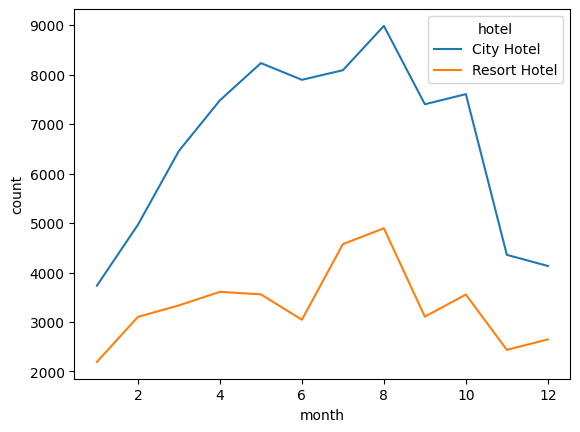

In [25]:
sns.lineplot(x='month',y='count',hue='hotel',data=monthlyData)

Lead Time vs. Average Daily Rate:
* Create a scatter plot to show the relationship between lead_time and adr.
* Use different colors to represent different hotel types and add a regression line to observe the trend.



In [27]:
ggplot(df[df['adr']<4000].sample(1000),aes(x="lead_time",y="adr",color="hotel")) + geom_point(size=2,alpha=0.5) + geom_smooth()

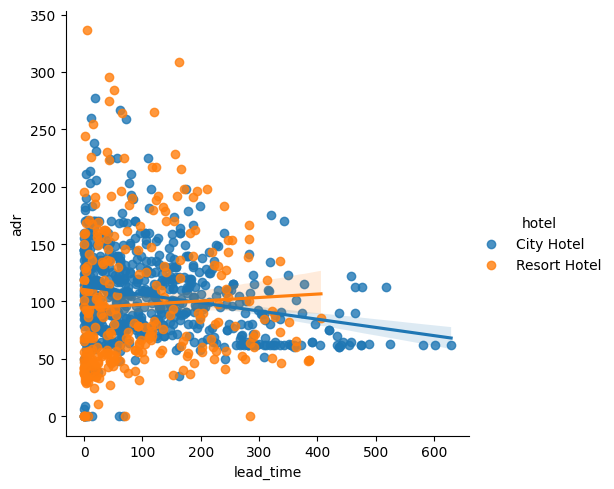

In [33]:
sns.lmplot(x="lead_time",y="adr",hue="hotel",data=df[df['adr']<4000].sample(1000))

Cancellation Rate by Market Segment:
* Create a bar plot to show the cancellation rate for each market_segment.
* Use different colors to represent the different hotels (sic!).
* Extended with Facetting: Use a FacetGrid to create separate plots for each month to observe how cancellation rates vary across different market segments over the year.



In [43]:
cancellationData = df.groupby(['market_segment','hotel','arrival_date_month'])['is_canceled'].mean().reset_index(name="cancelrate")
cancellationData

,market_segment,hotel,arrival_date_month,cancelrate
0,Aviation,City Hotel,April,0.170732
1,Aviation,City Hotel,August,1.000000
2,Aviation,City Hotel,February,0.500000
3,Aviation,City Hotel,January,0.166667
4,Aviation,City Hotel,July,0.142857
...,...,...,...,...
151,Online TA,Resort Hotel,May,0.369405
152,Online TA,Resort Hotel,November,0.231898
153,Online TA,Resort Hotel,October,0.327273
154,Online TA,Resort Hotel,September,0.366516


In [45]:
ggplot(cancellationData) + geom_bar(aes(x='market_segment',y='cancelrate',fill='hotel'), position='dodge', stat='identity') + facet_wrap("arrival_date_month")

<Axes: xlabel='market_segment', ylabel='cancelrate'>

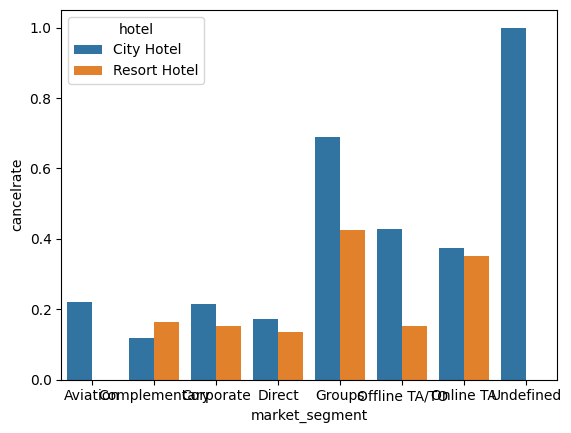

In [40]:
sns.barplot(x='market_segment',y='cancelrate',hue='hotel',data=cancellationData)

Distribution of Stay Duration:
* Create a histogram to visualize the distribution of the total stay duration (stays_in_weekend_nights + stays_in_week_nights).
* Use the hue parameter to differentiate between Resort Hotel and City Hotel.



In [47]:
df["total_stay"] = df["stays_in_week_nights"] + df["stays_in_weekend_nights"]
ggplot(df) + geom_histogram(aes(x="total_stay", fill="hotel"),alpha=0.5)

Revenue by Customer Type:
* Create a bar plot to show the total revenue generated by each customer_type.
* Use different colors to represent Resort Hotel and City Hotel.



In [50]:
df["revenue"] = df["total_stay"] * df["adr"]
revenueData = df.groupby(['customer_type','hotel'])['revenue'].sum().reset_index(name="segmentRevenue")
ggplot(revenueData) + geom_bar(aes(x='customer_type',y='segmentRevenue',fill='hotel'), position='dodge', stat='identity')


Booking Distribution by Room Type:
* Create a count plot to visualize the number of bookings for each assigned_room_type.
* Use different colors to represent different hotel types.



<Axes: xlabel='assigned_room_type', ylabel='count'>

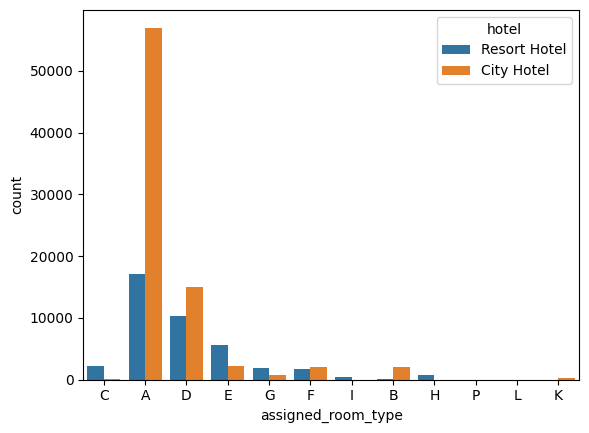

In [51]:
sns.countplot(x="assigned_room_type",hue="hotel",data=df)

Average Daily Rate Over Time:
* Create a line plot to show the trend of adr over time.
* Use color to differentiate between Resort Hotel and City Hotel.



In [60]:
def get_month_fraction(month):
    months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
    return(months.index(month)/12.0)


adrData = df.groupby(['arrival_date_year','arrival_date_month','hotel'])['adr'].mean().reset_index(name="adrAverage")
adrData['month'] = adrData['arrival_date_month'].apply(get_month_fraction)
adrData['timepoint'] = adrData['arrival_date_year'] + adrData['month']
ggplot(adrData) + geom_line(aes(x="timepoint",y="adrAverage",color="hotel"))

Impact of Special Requests on Average Daily Rate:
* Create a boxplot to visualize the impact of the number of special requests (total_of_special_requests) on adr.
* Use the color parameter to differentiate between different customer_type.
* Extended with Facetting: Use a FacetGrid to create separate plots for each month to observe how special requests impact adr across the year.



In [62]:
ggplot(df[df['adr']<4000]) + geom_boxplot(aes(x='total_of_special_requests', y='adr', fill='customer_type')) + facet_wrap("arrival_date_month")

Revenue Heatmap by Month and Hotel Type:
* Create a heatmap to visualize the average adr for each month and hotel type.
* Use the cmap parameter to choose an appropriate color palette.

In [76]:
heatmap_data=df.groupby(["arrival_date_month","hotel"])["adr"].mean().reset_index(name="revenue")
heatmap_data

,arrival_date_month,hotel,revenue
0,April,City Hotel,111.251838
1,April,Resort Hotel,77.849496
2,August,City Hotel,114.680455
3,August,Resort Hotel,186.790574
4,December,City Hotel,88.826307
5,December,Resort Hotel,68.984230
6,February,City Hotel,85.088278
7,February,Resort Hotel,55.171930
8,January,City Hotel,82.628986
9,January,Resort Hotel,49.461883


In [78]:
ggplot(heatmap_data, aes('arrival_date_month','hotel', fill= 'revenue')) +  geom_tile()

<Axes: xlabel='arrival_date_month', ylabel='hotel'>

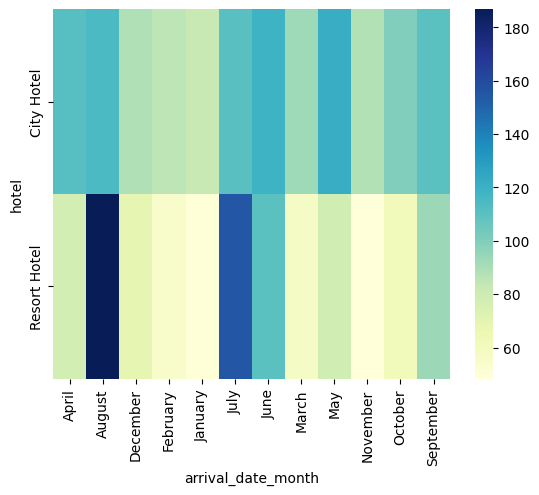

In [79]:
heatmap_data=df.groupby(["hotel","arrival_date_month"])["adr"].mean().unstack()
heatmap_data
sns.heatmap(data=heatmap_data,cmap="YlGnBu")